<h1 align="center">Comparison of different data filters- Elo </h1>

### Import Libraries

In [1]:
# Third-Party Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc_context
import seaborn as sns
import os
import dataio
from tabulate import tabulate
from IPython.display import display, HTML
import matplotlib.ticker as ticker
from itertools import product 
from scipy.stats import f_oneway
import colorcet as cc
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler


c:\Users\Ghislaine\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Set the directory

In [2]:
main_path = 'C:/Users/Ghislane/Desktop/optimal_difficulty_1/code/data/sides/'

main_folder = 'elo_bins'

# set the current working directory
os.chdir(main_path + main_folder)


# 1- Raw Data 

## check dates

In [3]:
# read train_data_original.csv
train_data = pd.read_csv('train_data_original.csv')
# max date_time
max_date_time = train_data['date_time'].max()
# min date_time
min_date_time = train_data['date_time'].min()
print('train data dates: ', min_date_time, max_date_time)

# read test_data_original.csv
test_data = pd.read_csv('test_data_original.csv')
# max date_time
max_date_time = test_data['date_time'].max()
# min date_time
min_date_time = test_data['date_time'].min()
print('test data (ECNp)dates: ', min_date_time, max_date_time)



train data dates:  2020-11-16T00:02:44Z 2021-03-14T23:58:36Z


C:\Users\Ghislaine\AppData\Local\Temp\ipykernel_30356\3528639627.py:10: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv('test_data_original.csv')


test data (ECNp)dates:  2021-03-15T10:00:11Z 2021-03-17T16:11:42Z


In [4]:
test_data

# number of unique questions 
unique_questions = test_data['question'].nunique()
print('number of unique questions: ', unique_questions)
# number of unique questions that anwer_option==QUA
nb_QUA_questions=test_data[test_data['answer_option']=='QUA']['question'].nunique()
print('number of unique questions that anwer_option==QUA: ', nb_QUA_questions)

# proportion of unique questions that anwer_option==QUA
prop_QUA_questions = nb_QUA_questions/unique_questions
print('proportion of unique questions that anwer_option==QUA: ', prop_QUA_questions)

number of unique questions:  416
number of unique questions that anwer_option==QUA:  21
proportion of unique questions that anwer_option==QUA:  0.05048076923076923


In [5]:
# input train-test info

# nb of unique students in train_data
nb_students_train = train_data['student'].nunique()
print('nb of unique students in train_data: ', nb_students_train)
# nb of unique questions in train_data
nb_questions_train = train_data['question'].nunique()
print('nb of unique questions in train_data: ', nb_questions_train)
# nb of rows in train_data
nb_rows_train = train_data.shape[0]
print('nb of rows in train_data: ', nb_rows_train)

# nb of unique students in test_data
nb_students_test = test_data['student'].nunique()
print('nb of unique students in test_data: ', nb_students_test)
# nb of unique questions in test_data
nb_questions_test = test_data['question'].nunique()
print('nb of unique questions in test_data: ', nb_questions_test)
# nb of rows in test_data
nb_rows_test = test_data.shape[0]
print('nb of rows in test_data: ', nb_rows_test)



nb of unique students in train_data:  8637
nb of unique questions in train_data:  450492
nb of rows in train_data:  24000561
nb of unique students in test_data:  8662
nb of unique questions in test_data:  416
nb of rows in test_data:  3556470


# 2- Input Elo (Cleaned Version)

In [6]:
# go to main_path + main_folder+ '/group1/processed'

# set the current working directory
os.chdir(main_path + main_folder + '/group1/processed')

# read verbose.txt
verbose = pd.read_csv('verbose.txt', sep = '\t')
# print the verbose
print(tabulate(verbose, headers = 'keys', tablefmt = 'psql'))

# read train_set.csv
train_set_input = pd.read_csv('train_set.csv')
# read test_set.csv
test_set_input = pd.read_csv('test_set.csv')

# nb of unique students in train_set
nb_students_train_set = train_set_input['user_id'].nunique()
print('nb of unique students in train_set: ', nb_students_train_set)
# nb of unique questions in train_set
nb_questions_train_set = train_set_input['item_id'].nunique()
print('nb of unique questions in train_set: ', nb_questions_train_set)
# nb of rows in train_set
nb_rows_train_set = train_set_input.shape[0]
print('nb of rows in train_set: ', nb_rows_train_set)

# nb of unique students in test_set
nb_students_test_set = test_set_input['user_id'].nunique()
print('nb of unique students in test_set: ', nb_students_test_set)
# nb of unique questions in test_set
nb_questions_test_set = test_set_input['item_id'].nunique()
print('nb of unique questions in test_set: ', nb_questions_test_set)
# nb of rows in test_set
nb_rows_test_set = test_set_input.shape[0]
print('nb of rows in test_set: ', nb_rows_test_set)

# sparsity of the student-item_id matrix
# have only student and item_id columns
student_question = train_set_input[['user_id', 'item_id']]
# Calculate the total number of unique student-question combinations
total_combinations = student_question.drop_duplicates().shape[0]
# Calculate the total number of students
total_students = student_question['user_id'].nunique()
# Calculate the total number of unique questions
total_questions = student_question['item_id'].nunique()
# Calculate the number of non-null unique student-question combinations
non_null_combinations = student_question.drop_duplicates().shape[0]
# Calculate the sparsity as the ratio of missing values (unique student-question combinations) to total possible values (total_students * total_questions)
sparsity = 1.0 - (non_null_combinations / (total_students * total_questions))
# Convert the sparsity to percentage
sparsity_percentage = sparsity * 100
print('Sparsity Train (User, Question): ', sparsity_percentage, '%')


# sparsity of the student-question matrix
# have only student and question columns
student_question = test_set_input[['user_id', 'item_id']]
# Calculate the total number of unique student-question combinations
total_combinations = student_question.drop_duplicates().shape[0]
# Calculate the total number of students
total_students = student_question['user_id'].nunique()
# Calculate the total number of unique questions
total_questions = student_question['item_id'].nunique()
# Calculate the number of non-null unique student-question combinations
non_null_combinations = student_question.drop_duplicates().shape[0]
# Calculate the sparsity as the ratio of missing values (unique student-question combinations) to total possible values (total_students * total_questions)
sparsity = 1.0 - (non_null_combinations / (total_students * total_questions))
# Convert the sparsity to percentage
sparsity_percentage = sparsity * 100
print('Sparsity Test (User, Question): ', sparsity_percentage, '%')



+----+-------------------------------------------------------------------------------------+
|    | Opened SIDES train data. Output: 24000561 samples.                                  |
|----+-------------------------------------------------------------------------------------|
|  0 | Opened SIDES test data. Output: 3556470 samples.                                    |
|  1 | Merged train and test data. Output: 27557031 samples.                               |
|  2 | Number of unique students: 8662.                                                    |
|  3 | Number of unique questions: 450908.                                                 |
|  4 | Number of rows: 27557031.                                                           |
|  5 | 1- number of unique questions in each quest_type                                    |
|  6 | quest_type                                                                          |
|  7 | DP           297638                                            

## For each student and specialty calculate the mean diffciulty and proportion correct in ECNp


In [7]:
limit_n_quest_in_spec_ECNP=20
limit_st_with_n_spec_in_ECNP=5
limit_n_question_in_spec_training= 100

print('minimum number of questions in the specialty in ECNP: ', limit_n_quest_in_spec_ECNP)
print('minimum number of questions in the specialty in training: ', limit_n_question_in_spec_training)
print('minimum number of specialties in ECNP: ', limit_st_with_n_spec_in_ECNP)


minimum number of questions in the specialty in ECNP:  20
minimum number of questions in the specialty in training:  100
minimum number of specialties in ECNP:  5


#### calculate the ecnp prop correct for each student in each specialty

C:\Users\Ghislaine\AppData\Local\Temp\ipykernel_30356\281837601.py:5: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test_original = pd.read_csv('test_data_original.csv')


number of unique students in the df_test_original:  8662
number of unique questions in the df_test_original:  416
number of unique students in the df_test_original_without_nan:  8636
number of unique questions in the df_test_original_without_nan:  372
number of unique students in prop_correct_ecvp:  8636


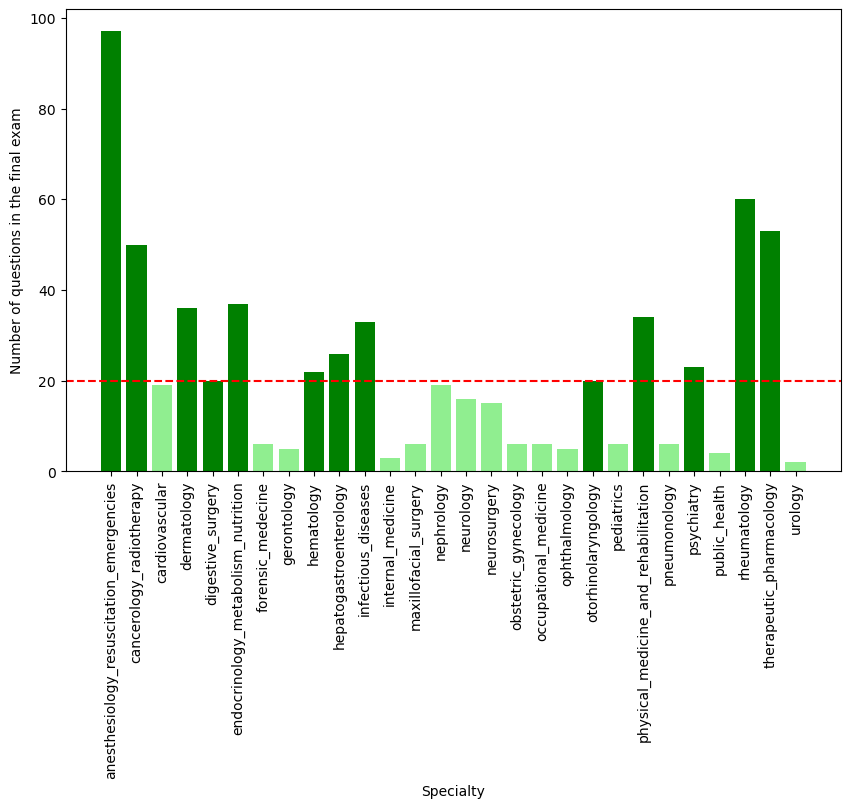

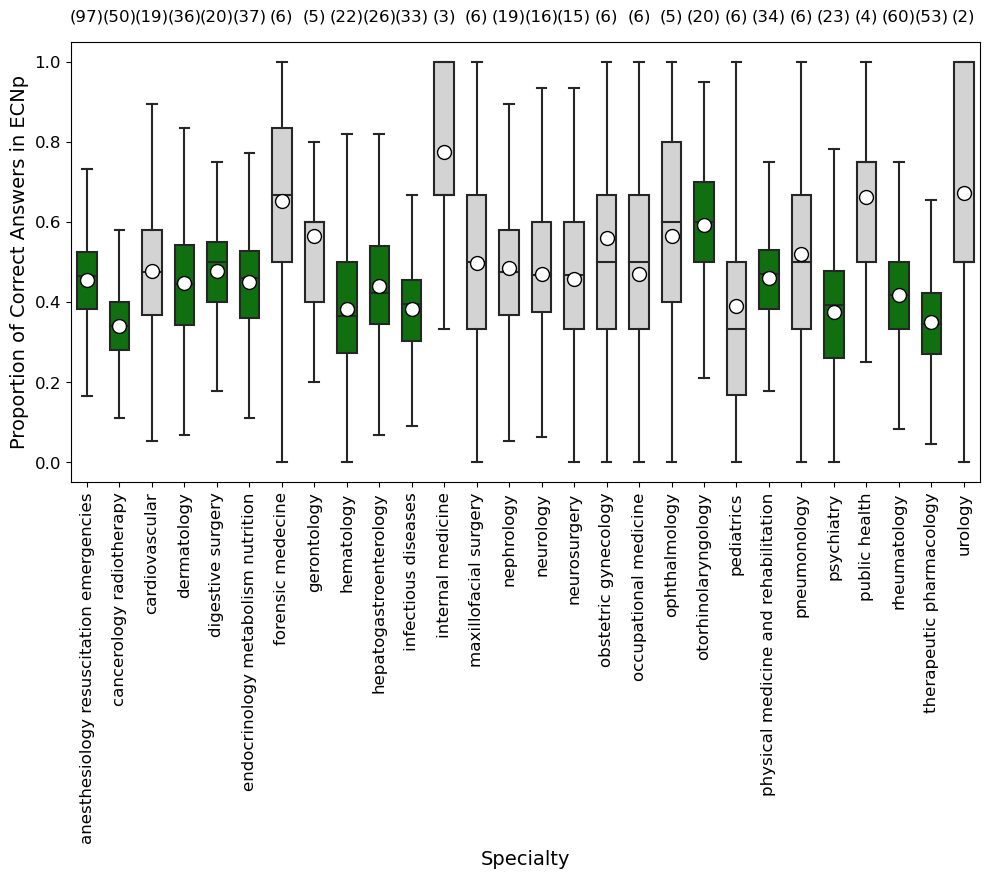

<Figure size 640x480 with 0 Axes>

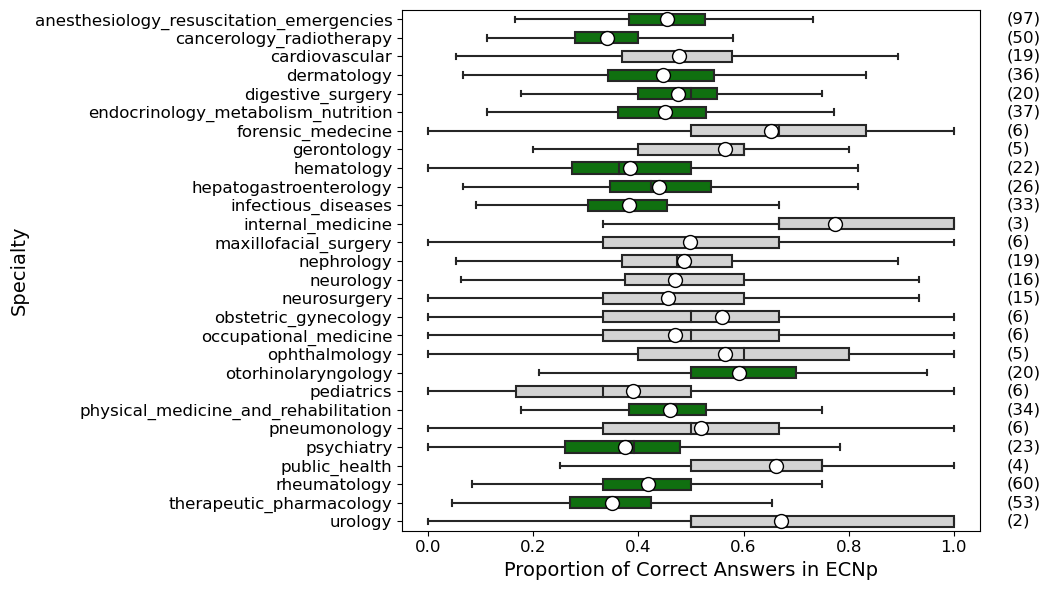

In [8]:

# set the current working directory
os.chdir(main_path + main_folder)

# Load the original test data
df_test_original = pd.read_csv('test_data_original.csv')

# repeat the row bby + in the specialty column
df_test_original['specialty'] = df_test_original['specialty'].str.split('+')
df_test_original = df_test_original.explode('specialty')

# number of unique students and questions in the df_test_original
print('number of unique students in the df_test_original: ', df_test_original['student'].nunique())
print('number of unique questions in the df_test_original: ', df_test_original['question'].nunique())

df_test_original_without_nan = df_test_original[~df_test_original['specialty'].isnull()]

print('number of unique students in the df_test_original_without_nan: ', df_test_original_without_nan['student'].nunique())
print('number of unique questions in the df_test_original_without_nan: ', df_test_original_without_nan['question'].nunique())

# get the average result for each student in each specialty. result is the column
# Group by 'student' and 'specialty' and calculate the proportion of correct scores
prop_correct_ecvp = df_test_original.groupby(['student', 'specialty']).agg(
    prop_correct_ecn=('result', 'mean')
    # nb of questions in the specialty
).reset_index()

# remove NAN specialties
prop_correct_ecvp = prop_correct_ecvp[~prop_correct_ecvp['specialty'].isnull()]
# number of unique students in prop_correct_ecvp
print('number of unique students in prop_correct_ecvp: ', prop_correct_ecvp['student'].nunique())

# find the number of unique questions per specialty asked in the df_test_original
num_questions_per_specialty = df_test_original.groupby('specialty').agg(
    n_question_in_spec_ecn=('question', 'nunique')
).reset_index()


# # plot the bar plot of the number of questions per specialty
plt.figure(figsize=(10, 6))
plt.bar(num_questions_per_specialty['specialty'], num_questions_per_specialty['n_question_in_spec_ecn'])
plt.xticks(rotation=90)
plt.xlabel('Specialty')
plt.ylabel('Number of questions in the final exam')
# plot a horizontal line at y=limit_n_quest_in_spec_ECNP
plt.axhline(y=limit_n_quest_in_spec_ECNP, color='r', linestyle='--')

# color the bars with n_question_in_spec_ecn>=limit_n_quest_in_spec_ECNP to vivid green
plt.bar(num_questions_per_specialty['specialty'][num_questions_per_specialty['n_question_in_spec_ecn']>=limit_n_quest_in_spec_ECNP], num_questions_per_specialty['n_question_in_spec_ecn'][num_questions_per_specialty['n_question_in_spec_ecn']>=limit_n_quest_in_spec_ECNP], color='green')
# color the bars with n_question_in_spec_ecn<limit_n_quest_in_spec_ECNP to light green
plt.bar(num_questions_per_specialty['specialty'][num_questions_per_specialty['n_question_in_spec_ecn']<limit_n_quest_in_spec_ECNP], num_questions_per_specialty['n_question_in_spec_ecn'][num_questions_per_specialty['n_question_in_spec_ecn']<limit_n_quest_in_spec_ECNP], color='lightgreen')
plt.show()

# find the specialties with at least limit_n_quest_in_spec_ECNP questions asked in the final exam
spec_with_enough_questions = num_questions_per_specialty[
    num_questions_per_specialty['n_question_in_spec_ecn'] >= limit_n_quest_in_spec_ECNP
]['specialty'].unique()

#del df_test_original


# have the box plot of the proportion of correct answers per specialty with specialties in which n_question_in_spec_ecn>=limit_n_quest_in_spec_ECNP in vivid green box plots and specialties in which n_question_in_spec_ecn<limit_n_quest_in_spec_ECNP in light green box plots. also add a second y axis with the number of questions per specialty with line plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 9))



# Define color palette based on the condition
color_palette = ['green' if num >= limit_n_quest_in_spec_ECNP else 'lightgray' for num in num_questions_per_specialty['n_question_in_spec_ecn']]

# Box plot
sns.boxplot(x='specialty', y='prop_correct_ecn', data=prop_correct_ecvp, palette=color_palette, showfliers=False, showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"},width=0.6)
plt.xticks(rotation=90, fontsize=12)
# in x axis replace underscores with spaces in specialty names
plt.xticks(ticks=range(len(num_questions_per_specialty)), labels=[spec.replace('_', ' ') for spec in num_questions_per_specialty['specialty']], fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Specialty', fontsize=14)
plt.ylabel('Proportion of Correct Answers in ECNp', fontsize=14)

# Annotate number of questions per specialty next to specialty name on x-axis
annotation_height = prop_correct_ecvp['prop_correct_ecn'].max() * 1.1  # Adjust height as needed
for i, spec in enumerate(num_questions_per_specialty['specialty']):
    num_questions = num_questions_per_specialty['n_question_in_spec_ecn'].iloc[i]
    plt.text(i, annotation_height, f"({num_questions})", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# save the plot
plt.savefig('boxplot_prop_correct_answers_per_specialty.png', dpi=300, bbox_inches='tight')


# horizontal box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y='specialty', x='prop_correct_ecn', data=prop_correct_ecvp, palette=color_palette, showfliers=False, showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"},width=0.6)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Specialty', fontsize=14)
plt.xlabel('Proportion of Correct Answers in ECNp', fontsize=14)
plt.tight_layout()
# annotate the number of questions per specialty
for i, spec in enumerate(num_questions_per_specialty['specialty']):
    num_questions = num_questions_per_specialty['n_question_in_spec_ecn'].iloc[i]
    plt.text(prop_correct_ecvp['prop_correct_ecn'].max() * 1.1, i, f"({num_questions})", va='center', fontsize=12)
plt.show()



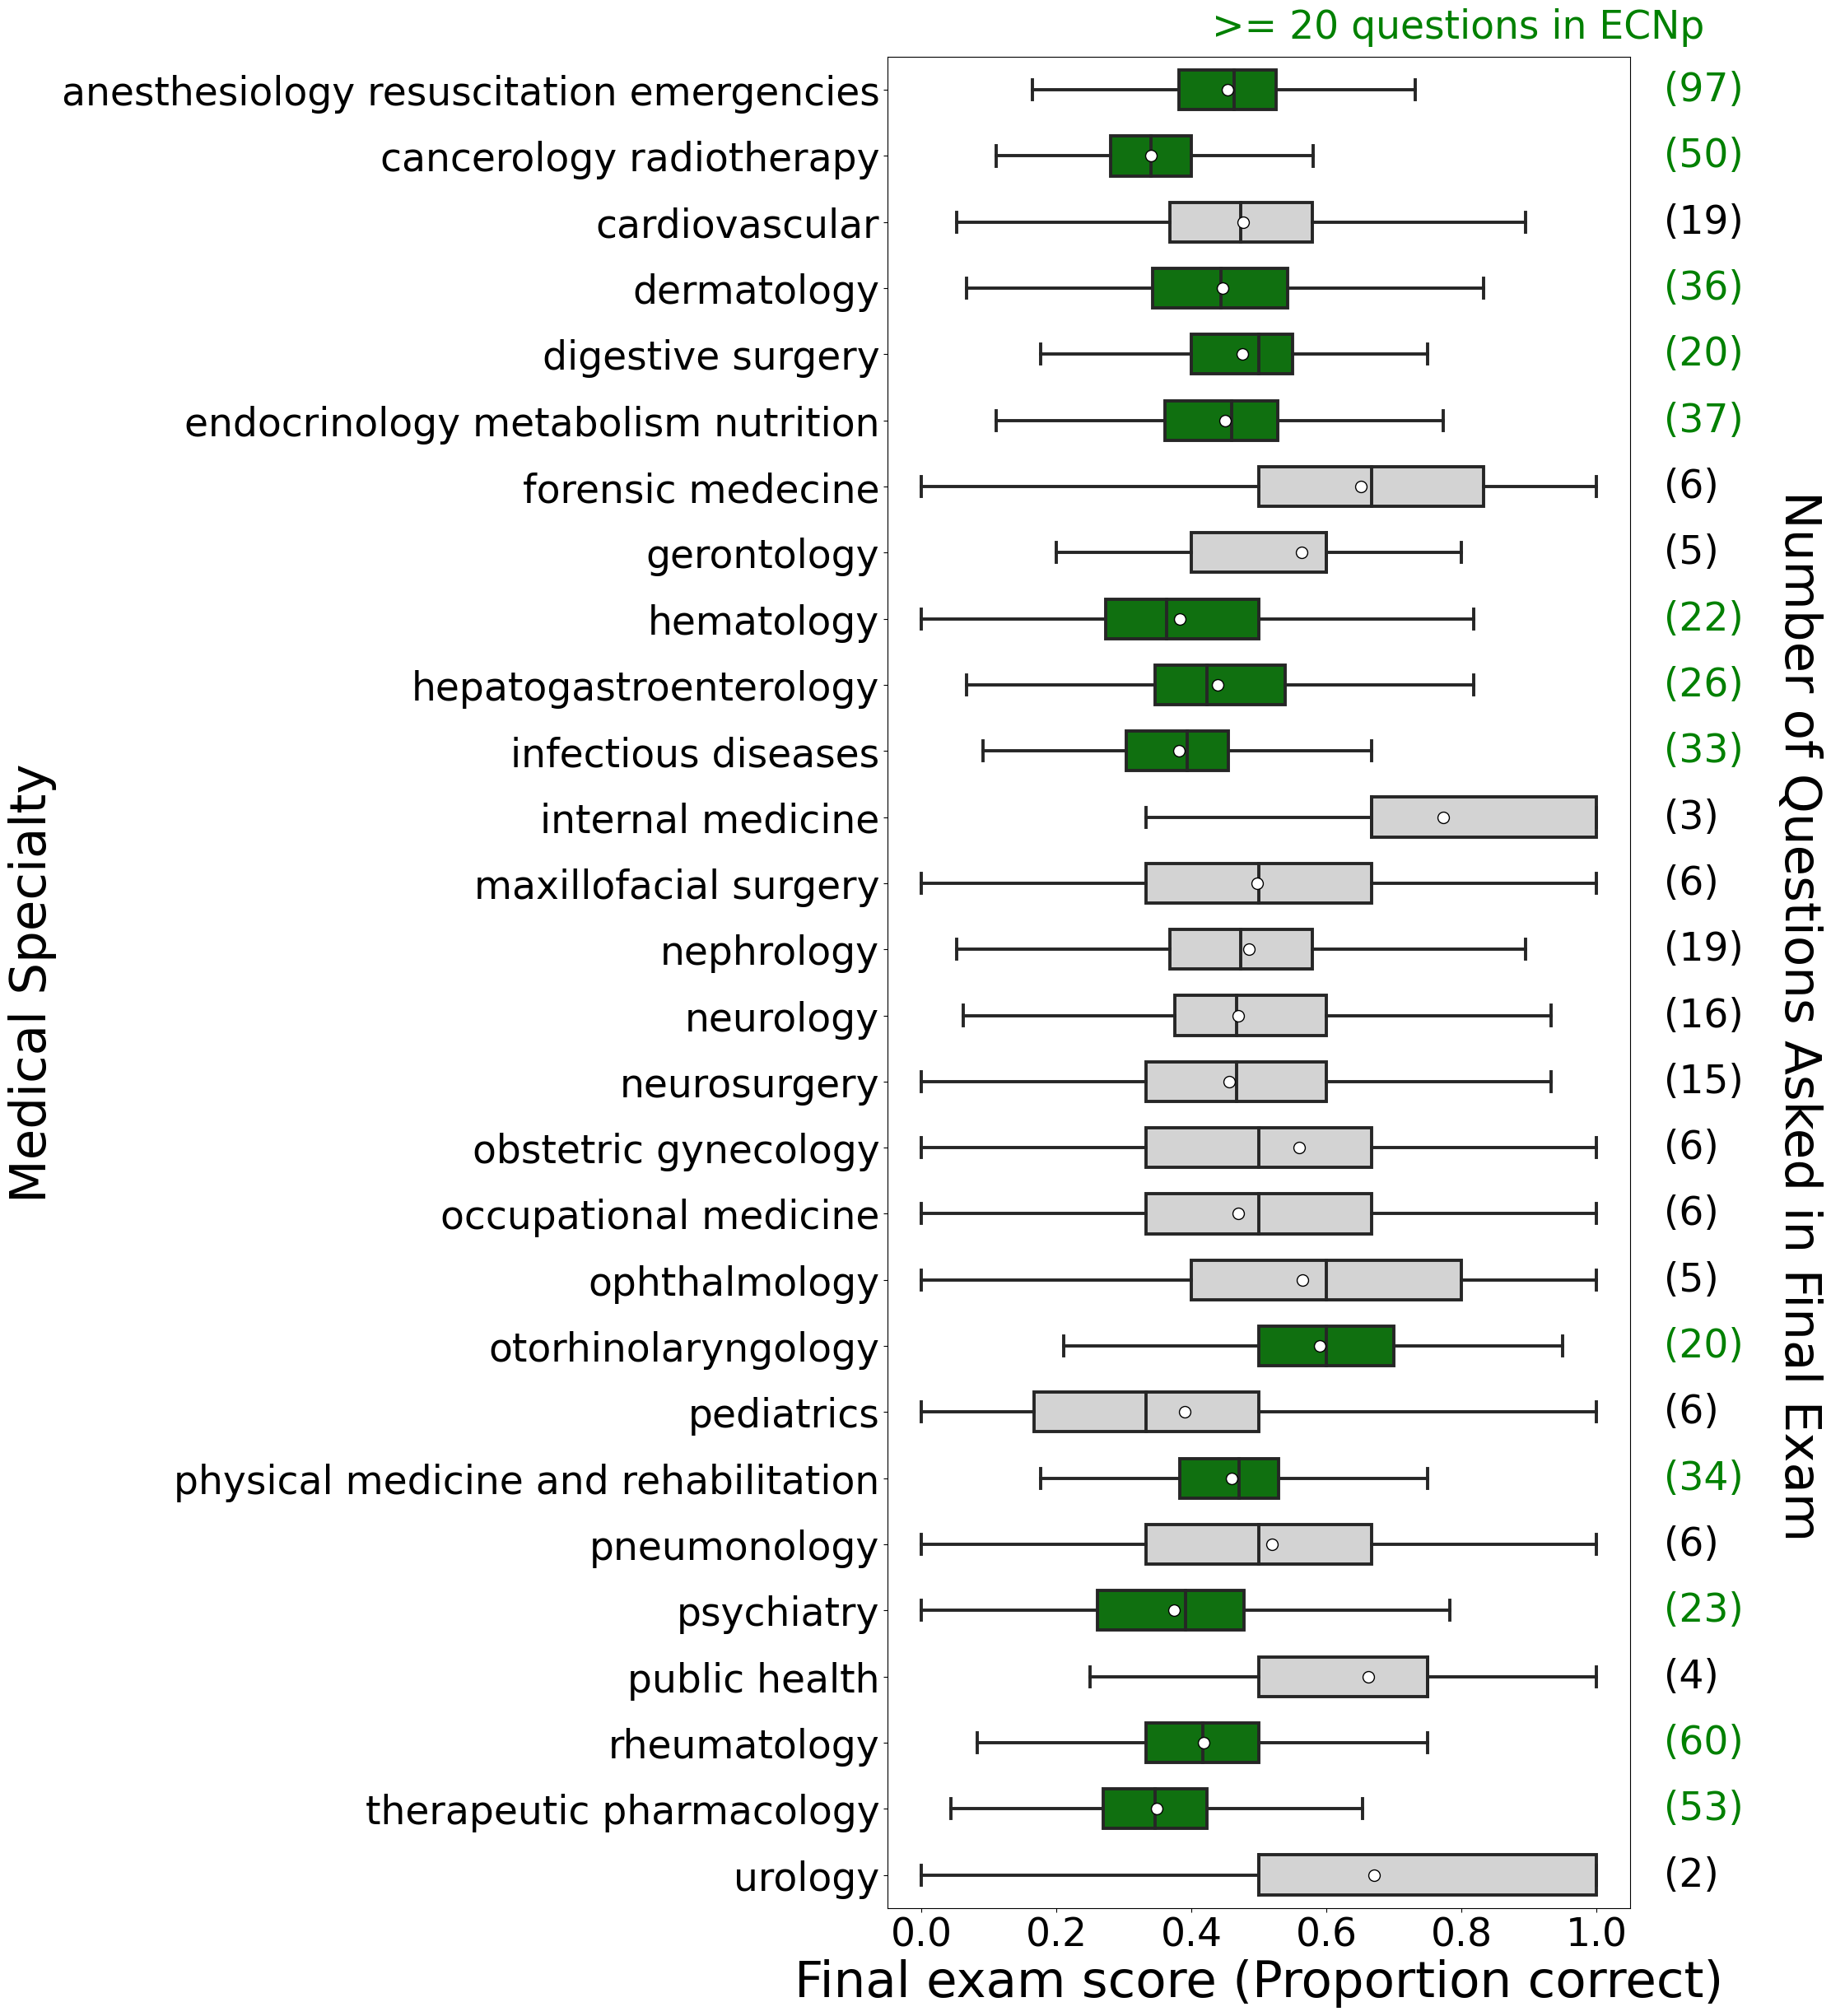

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace with your actual data)
# prop_correct_ecvp = ...
# num_questions_per_specialty = ...
# color_palette = ...
# limit_n_quest_in_spec_ECNP = ...

plt.figure(figsize=(20, 24))
sns.boxplot(
    y='specialty', x='prop_correct_ecn', data=prop_correct_ecvp, palette=color_palette,
    showfliers=False, showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black", "markersize": 10},
    width=0.6, linewidth=2.8
)

# Increase font sizes for ticks and labels
plt.yticks(fontsize=34)
plt.xticks(fontsize=34)
plt.ylabel('Medical Specialty', fontsize=44)
plt.xlabel('Final exam score (Proportion correct)', fontsize=44)

# Replace underscores with spaces in specialty names and adjust font size
plt.yticks(
    ticks=range(len(num_questions_per_specialty)),
    labels=[spec.replace('_', ' ') for spec in num_questions_per_specialty['specialty']],
    fontsize=34
)

plt.tight_layout()

# Annotate the number of questions per specialty
for i, spec in enumerate(num_questions_per_specialty['specialty']):
    num_questions = num_questions_per_specialty['n_question_in_spec_ecn'].iloc[i]
    if num_questions >= limit_n_quest_in_spec_ECNP:
        plt.text(
            prop_correct_ecvp['prop_correct_ecn'].max() * 1.1, i, f"({num_questions})",
            va='center', fontsize=34, color='green'
        )
    else:
        plt.text(
            prop_correct_ecvp['prop_correct_ecn'].max() * 1.1, i, f"({num_questions})",
            va='center', fontsize=34
        )

# Add a title to the right y-axis
plt.text(
    prop_correct_ecvp['prop_correct_ecn'].max() * 1.30, len(num_questions_per_specialty) / 2,
    'Number of Questions Asked in Final Exam', va='center', ha='center', fontsize=44, rotation=-90
)

# # Add annotation about the number of questions in green
# plt.text(
#     prop_correct_ecvp['prop_correct_ecn'].max() * 1.30, (len(num_questions_per_specialty) / 2) - 1,
#     '(Specialties with >= 20 questions in ECNp)', va='center', ha='center', fontsize=30, rotation=-90, color='green'
# )

# Add legend about color coding
plt.text(
    1.1, 1.01, '>= 20 questions in ECNp', transform=plt.gca().transAxes, fontsize=34, ha='right', color='green'
)

# Remove background
plt.gca().set_facecolor('none')

# Save the plot with higher resolution
plt.savefig('boxplot.png', dpi=300, bbox_inches='tight')
plt.show()


# 3- Output Elo

## Merge subruns with relative diffiuclty

In [7]:
attempt_filter= 1

# set the current directory to the main path + folder
os.chdir(main_path + main_folder)
# find the folders starting with 2020-2021_q
folders = [folder for folder in os.listdir() if folder.startswith('group')]

# for each folder 
for folder in folders:
    os.chdir(main_path + main_folder)
    # name folder is the str of the folder name after 2020-2021_q
    name_folder= str(folder)[5:]
    # find the file starting with result
    result_file = [file for file in os.listdir(folder) if file.startswith('result')]
    
    # go to the test_output folder
    os.chdir(folder + '/' + result_file[0] + '/test_output_without_update')
    # read the attempt_counter_question.csv file
    attempt_counter_question = pd.read_csv('attempt_counter_question.csv')
    # name the columns as question_id and attempt_count
    attempt_counter_question.columns = ['question', 'attempt_count']
    # read the question_difficulty.csv file
    question_difficulty = pd.read_csv('question_difficulty.csv')
    # name the columns as question_id and difficulty
    question_difficulty.columns = ['question', 'difficulty']

    # merge the two data frames by including all the questions
    question_dif_attempt = pd.merge(attempt_counter_question, question_difficulty, how='outer', on='question')

    # read the data_outputs.csv
    data_outputs = pd.read_csv('data_outputs.csv')
    # find the unique question and students in data_outputs with n where n is the name of the folder
    exec("unique_questions_%s = data_outputs['question'].unique()" % name_folder)
    exec("unique_students_%s = data_outputs['student'].unique()" % name_folder)
    
    ### ADD CURRENT YEAR STUDENT Ability
    os.chdir('../')
    os.chdir('test_output')
    st_ability_2020_2021 = pd.read_csv("learner_competency.csv")
    attempt_counter_student_2020_2021 = pd.read_csv("attempt_counter_student_spec.csv")
    
    # load listofKC 
    listofKC = pd.read_csv("listofKC.csv")
    listofKC = pd.DataFrame(listofKC)
    
    # Rename the column as 'skill_name'
    listofKC = listofKC.rename(columns={'0': 'skill_name'})

    # Reset the index and rename the index column
    listofKC = listofKC.reset_index().rename(columns={'index': 'skill_id'})

    # remove unnamed: 0 column
    listofKC = listofKC.drop(columns=['Unnamed: 0'])

    # rename the st_ability_2020_2021 columns by finding the skill_name corresponding to the skill_id in the listofKC
    for i in range(len(listofKC)):
        st_ability_2020_2021 = st_ability_2020_2021.rename(columns={str(i): listofKC['skill_name'][i]})
        attempt_counter_student_2020_2021=attempt_counter_student_2020_2021.rename(columns={str(i): listofKC['skill_name'][i]})
        
    # rename the Unnamed: 0 column to user_id
    st_ability_2020_2021 = st_ability_2020_2021.rename(columns={'Unnamed: 0': 'user_id'})
    attempt_counter_student_2020_2021=attempt_counter_student_2020_2021.rename(columns={'Unnamed: 0': 'user_id'})

    # have the columns until the last one as the specialty column and their values as the ability column and the last column as the student column
    st_ability_2020_2021 = st_ability_2020_2021.melt(id_vars=['user_id'], var_name='specialty', value_name='ability_2020_2021')
    attempt_counter_student_2020_2021=attempt_counter_student_2020_2021.melt(id_vars=['user_id'], var_name='specialty', value_name='attempt_count_student_2020_2021')
    
    # merge st_ability_2020_2021 and attempt_counter_student_2020_2021 based on user_id and specialty
    st_ability_2020_2021 = pd.merge(st_ability_2020_2021, attempt_counter_student_2020_2021, on=['user_id', 'specialty'], how='inner')
    
    # remove rows with attempt_count_student_2020_2021<attempt_filter
    st_ability_2020_2021 = st_ability_2020_2021[st_ability_2020_2021['attempt_count_student_2020_2021']>=attempt_filter]
    
    # back to folder 2020-2021_q
    os.chdir('../../')
    # open processed folder
    os.chdir('processed')
    # read train_set.csv
    train_set = pd.read_csv('train_set.csv')
    
    # add the timestamp_original column to data_outputs row by row
    data_outputs['timestamp_original'] = train_set['timestamp_original']
    
    # add the timestamp column to data_outputs row by row
    data_outputs['timestamp'] = train_set['timestamp']
    
    # add quest_difficulty column that give the difficulty of the question by the matched question in question_difficulty
    data_outputs['quest_difficulty'] = data_outputs['question'].map(question_dif_attempt.set_index('question')['difficulty'])
    
    # Split the 'specialty' column by '+' and explode it
    # first have not_split_data_outputs as data_outputs before splitting the specialty column
    not_split_data_outputs = data_outputs
    data_outputs = data_outputs.assign(specialty=data_outputs['specialty'].str.split('+')).explode('specialty')
    
    # add skill_difficulty_difference column that give the difference between the student average ability and the question difficulty
    data_outputs['skill_difficulty_difference'] = data_outputs['quest_difficulty'] - data_outputs['student_average_ability']
    
    # add group_no column that give the group number
    data_outputs['group_no'] = name_folder
    not_split_data_outputs['group_no'] = name_folder
    
    # change the student column name as user_id 
    data_outputs = data_outputs.rename(columns={'student': 'user_id'})
    not_split_data_outputs = not_split_data_outputs.rename(columns={'student': 'user_id'})
    # change the question column name as item_id
    data_outputs = data_outputs.rename(columns={'question': 'item_id'})
    not_split_data_outputs = not_split_data_outputs.rename(columns={'question': 'item_id'})
    
    # merge st_ability_2020_2021 and average_quest_dif based on user_id and specialty only if its in the average_quest_dif
    data_outputs = pd.merge(data_outputs, st_ability_2020_2021, on=['user_id', 'specialty'], how='inner')
    #not_split_data_outputs = pd.merge(not_split_data_outputs, st_ability_2020_2021, on=['user_id', 'specialty'], how='inner')

    # read old_new_user_ids.csv
    old_new_user_ids = pd.read_csv('old_new_user_ids.csv')
    
    # merge data_outputs and old_new_user_ids based on student_id
    data_outputs = pd.merge(data_outputs, old_new_user_ids, on='user_id', how='inner')
    not_split_data_outputs = pd.merge(not_split_data_outputs, old_new_user_ids, on='user_id', how='inner')
    
    # remove the student_id column
    data_outputs = data_outputs.drop(columns=['user_id'])
    not_split_data_outputs = not_split_data_outputs.drop(columns=['user_id'])
    
    # read old_new_item_ids.csv
    old_new_item_ids = pd.read_csv('old_new_item_ids.csv')
    
    # merge data_outputs and old_new_item_ids based on item_id
    data_outputs = pd.merge(data_outputs, old_new_item_ids, on='item_id', how='inner')
    not_split_data_outputs = pd.merge(not_split_data_outputs, old_new_item_ids, on='item_id', how='inner')
    
    # remove the item_id column
    data_outputs = data_outputs.drop(columns=['item_id'])
    not_split_data_outputs = not_split_data_outputs.drop(columns=['item_id'])
    
    # merge data_outputs and question_difficulty_attempt_2019_2020 based on question, inluce all the data_outputs even if its in the question_difficulty_attempt_2019_2020
    #data_outputs = pd.merge(data_outputs, question_difficulty_attempt_2019_2020, on='question' , how='outer')
    
    # first normalize the ability_2020_2021 and quest_difficulty columns
    # scaler = StandardScaler()
    # data_outputs[['ability_2020_2021', 'quest_difficulty']] = scaler.fit_transform(data_outputs[['ability_2020_2021', 'quest_difficulty']])
    
    # add skill_difficulty_difference2 column that give the difference between the student ability and the question difficulty
    data_outputs['skill_difficulty_difference2'] = data_outputs['quest_difficulty'] - data_outputs['ability_2020_2021']
    
    # if it is the first iteration then data_outputs_all is data_outputs
    if folder == folders[0]:
        data_outputs_all = data_outputs
        not_split_data_outputs_all = not_split_data_outputs
    # if it is not the first iteration then append data_outputs to data_outputs_all
    else:
        # but before check for the common students between data_outputs and data_outputs_all
        common_students = set(data_outputs['student']).intersection(set(data_outputs_all['student']))
        print ('number of common students between, ', name_folder, ' and all the previous groups: ', len(common_students))
        common_questions = set(data_outputs['question']).intersection(set(data_outputs_all['question']))
        print ('number of common questions between, ', name_folder, ' and all the previous groups: ', len(common_questions))
        # use concat to append data_outputs to data_outputs_all
        data_outputs_all = pd.concat([data_outputs_all, data_outputs])
        not_split_data_outputs_all = pd.concat([not_split_data_outputs_all, not_split_data_outputs])

# sort according to timestamp_original
data_outputs_all = data_outputs_all.sort_values(by=['timestamp_original'])
# save the data_outputs_all as csv file to main_path + main_folder
# os.chdir(main_path + main_folder)
# data_outputs_all.to_csv('data_outputs_all.csv', index=False)


In [6]:
data_outputs_all

,Unnamed: 0,specialty,question_dif,student_average_ability,specialty_average_difficulty,actual_score,elo_ExpectedScore,timestamp_original,timestamp,quest_difficulty,skill_difficulty_difference,group_no,ability_2020_2021,attempt_count_student_2020_2021,student,question,skill_difficulty_difference2
0,0,pediatrics,0.586745,0.080683,0.268871,0.0,0.337496,2020-11-16 00:02:44,0,0.586745,0.506062,1,0.144557,424.0,204124,2207200,0.442188
1,0,digestive_surgery,0.586745,0.080683,0.268871,0.0,0.337496,2020-11-16 00:02:44,0,0.586745,0.506062,1,0.016808,91.0,204124,2207200,0.569936
704979,1,hepatogastroenterology,0.892591,0.101080,0.336198,0.0,0.268952,2020-11-16 00:03:22,38,0.892591,0.791511,1,0.101080,171.0,204124,2110235,0.791511
705156,2,hepatogastroenterology,0.162224,0.101080,0.336198,0.0,0.421243,2020-11-16 00:04:02,78,0.162224,0.061144,1,0.101080,171.0,204124,2099627,0.061144
3305492,6,cardiovascular,-0.816604,0.917578,0.184704,0.0,0.859871,2020-11-16 00:04:37,113,-0.816604,-1.734182,1,0.917578,578.0,101620,363803,-1.734182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21853956,18503104,hematology,1.570928,-0.815865,0.154632,0.0,0.258404,2021-03-14 23:58:36,10281352,1.570928,2.386793,1,-0.815865,38.0,191515,349537,2.386793
21852478,18503099,hematology,-0.655950,-0.815865,0.154632,0.0,0.537604,2021-03-14 23:58:36,10281352,-0.655950,0.159916,1,-0.815865,38.0,191515,349530,0.159916
21854808,18503107,hematology,1.387503,-0.815865,0.154632,0.0,0.115902,2021-03-14 23:58:36,10281352,1.387503,2.203368,1,-0.815865,38.0,191515,349548,2.203368
21854523,18503106,hematology,-1.246471,-0.815865,0.154632,1.0,0.654847,2021-03-14 23:58:36,10281352,-1.246471,-0.430606,1,-0.815865,38.0,191515,349544,-0.430606


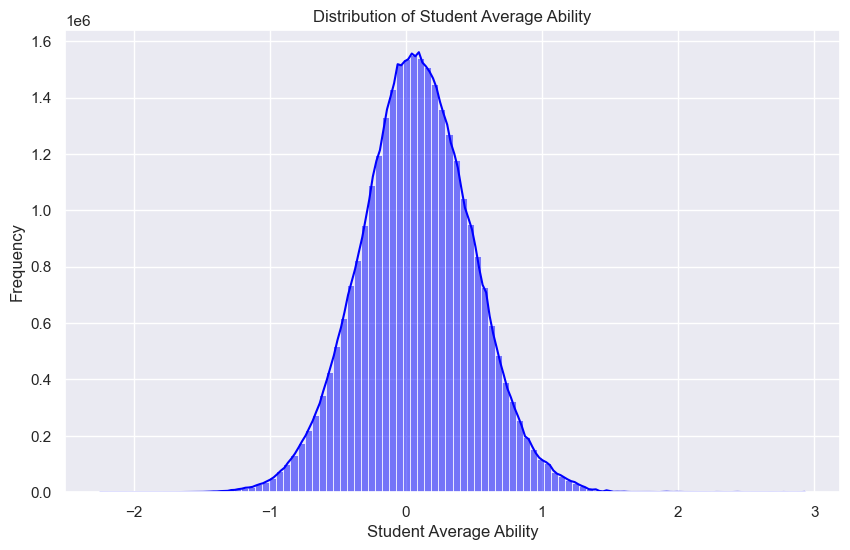

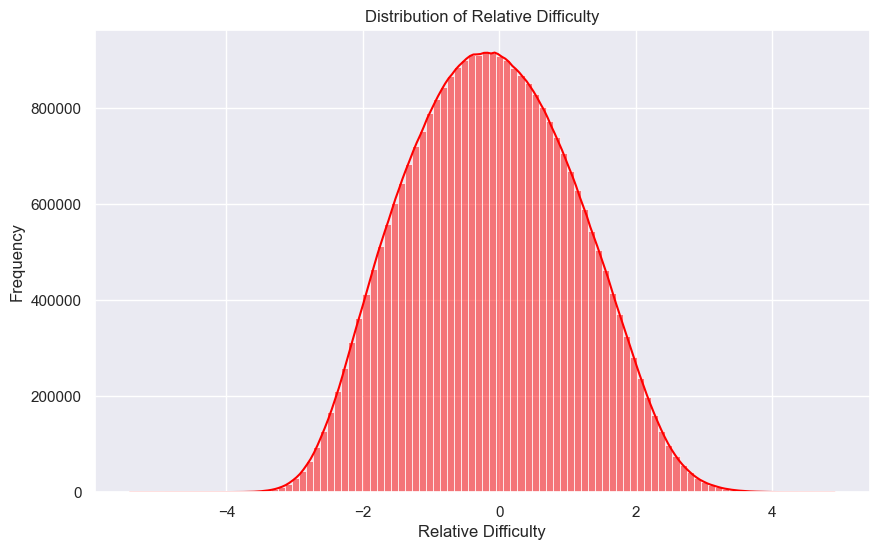

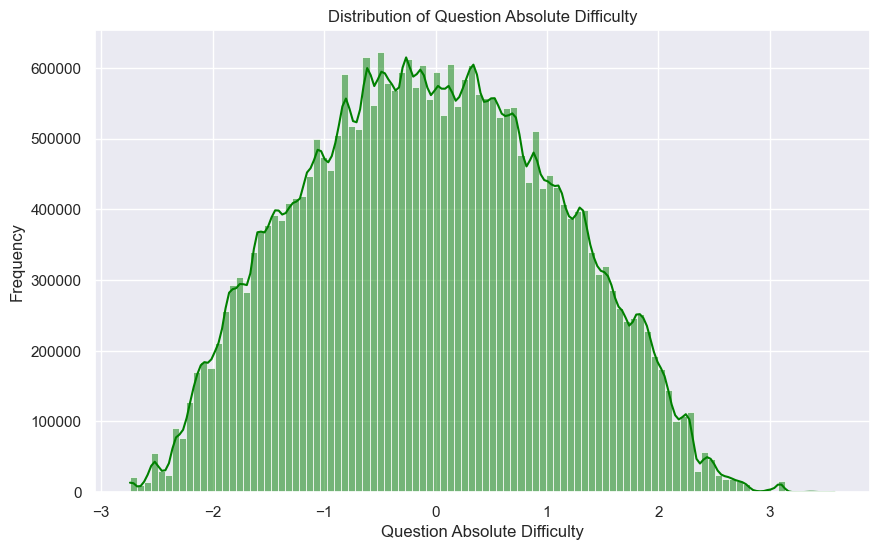

+----+------------------------------+------------+------------+----------------------+----------+
|    | Variable                     |       Mean |     Median |   Standard Deviation |    Range |
|----+------------------------------+------------+------------+----------------------+----------|
|  0 | Student Average Ability      |  0.0784379 |  0.0760665 |             0.407268 |  5.17535 |
|  1 | Relative Difficulty          | -0.121141  | -0.13763   |             1.20704  | 10.33    |
|  2 | Question Absolute Difficulty | -0.0427034 | -0.0613116 |             1.11944  |  6.3215  |
+----+------------------------------+------------+------------+----------------------+----------+


In [29]:
# distribution of student_average_ability, skill_difficulty_difference, and quest_difficulty seperately
plt.figure(figsize=(10, 6))
sns.histplot(data_outputs_all['student_average_ability'], kde=True, color='blue', bins=100)
plt.xlabel('Student Average Ability')
plt.ylabel('Frequency')
plt.title('Distribution of Student Average Ability')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_outputs_all['skill_difficulty_difference'], kde=True, color='red', bins=100)
plt.xlabel('Relative Difficulty')
plt.ylabel('Frequency')
plt.title('Distribution of Relative Difficulty')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_outputs_all['quest_difficulty'], kde=True, color='green', bins=100)
plt.xlabel('Question Absolute Difficulty')
plt.ylabel('Frequency')
plt.title('Distribution of Question Absolute Difficulty')
plt.show()

# table of mean, median, sd, and range of student_average_ability, skill_difficulty_difference, and quest_difficulty
table = pd.DataFrame({
    'Variable': ['Student Average Ability', 'Relative Difficulty', 'Question Absolute Difficulty'],
    'Mean': [data_outputs_all['student_average_ability'].mean(), data_outputs_all['skill_difficulty_difference'].mean(), data_outputs_all['quest_difficulty'].mean()],
    'Median': [data_outputs_all['student_average_ability'].median(), data_outputs_all['skill_difficulty_difference'].median(), data_outputs_all['quest_difficulty'].median()],
    'Standard Deviation': [data_outputs_all['student_average_ability'].std(), data_outputs_all['skill_difficulty_difference'].std(), data_outputs_all['quest_difficulty'].std()],
    'Range': [data_outputs_all['student_average_ability'].max() - data_outputs_all['student_average_ability'].min(), data_outputs_all['skill_difficulty_difference'].max() - data_outputs_all['skill_difficulty_difference'].min(), data_outputs_all['quest_difficulty'].max() - data_outputs_all['quest_difficulty'].min()]
})

print(tabulate(table, headers = 'keys', tablefmt = 'psql'))



## Distribution of the data_outputs_all

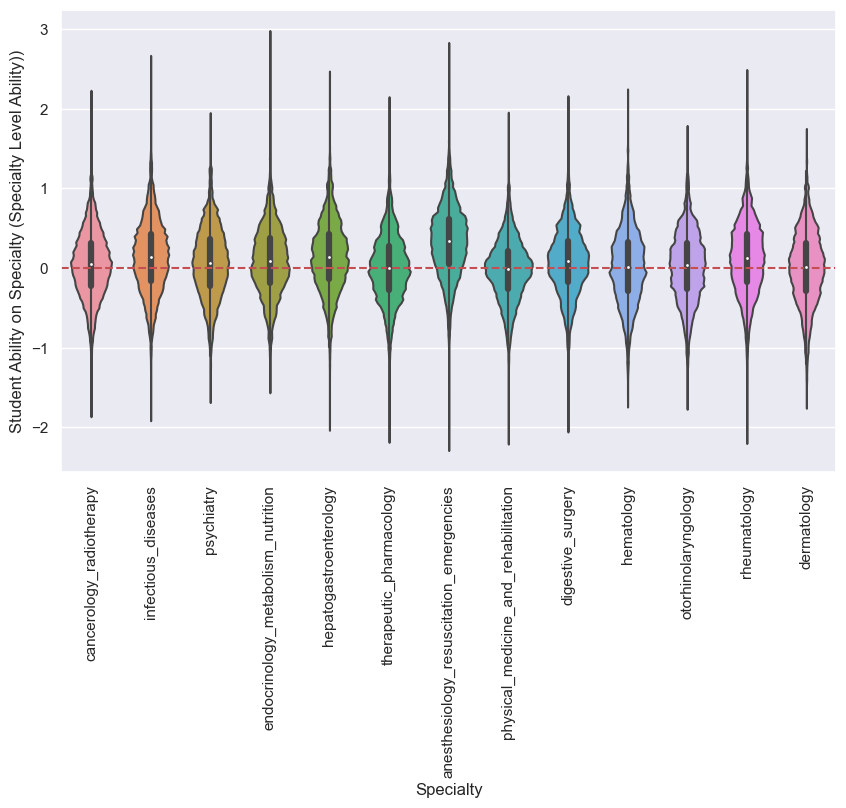

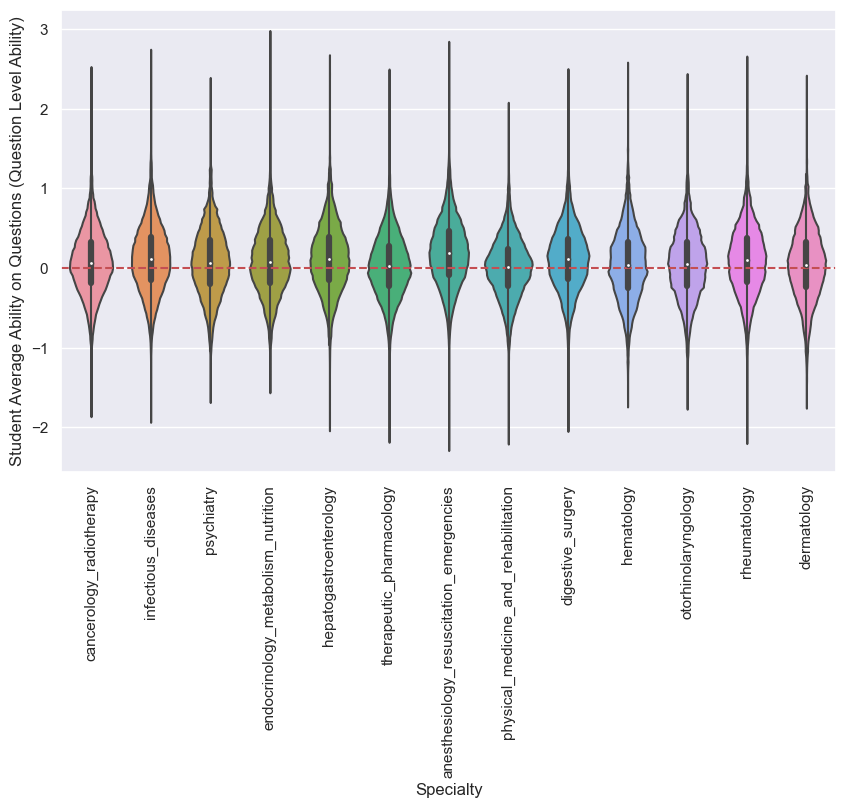

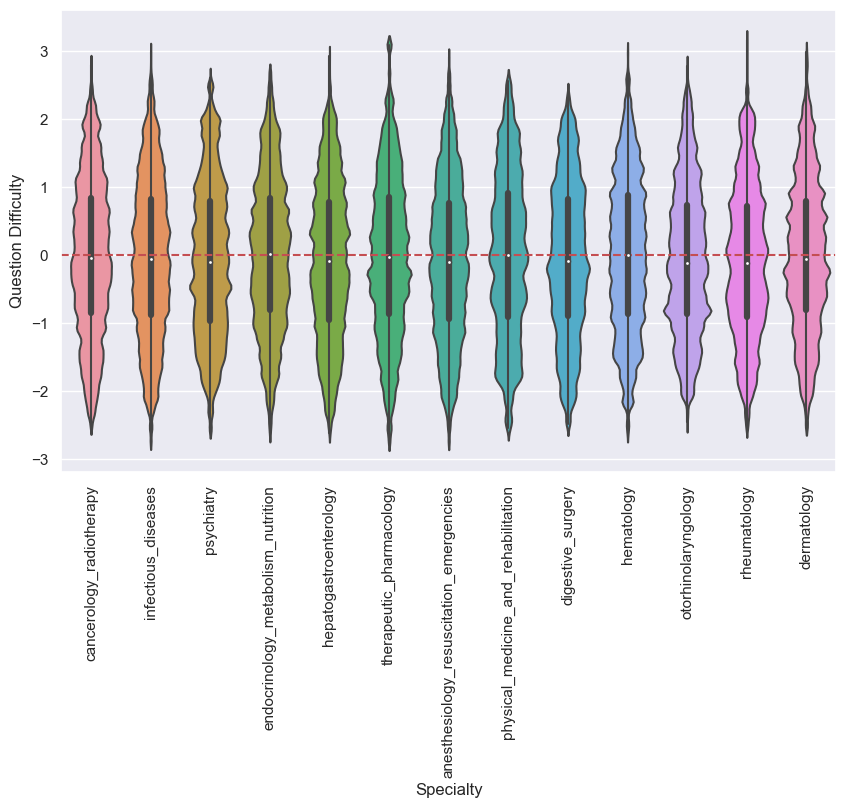

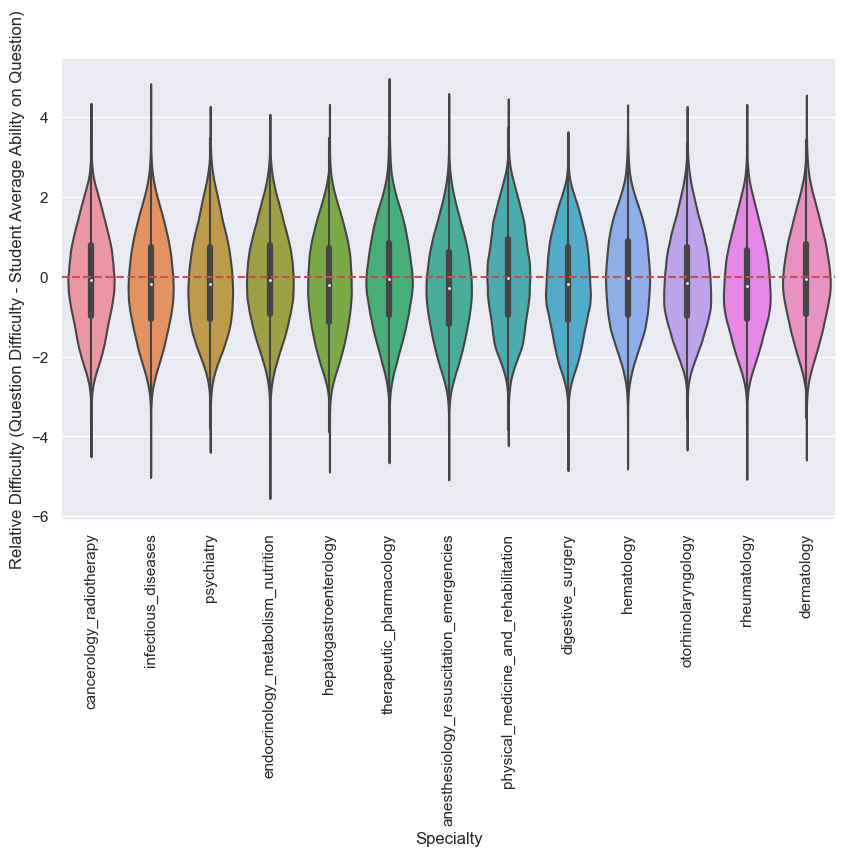

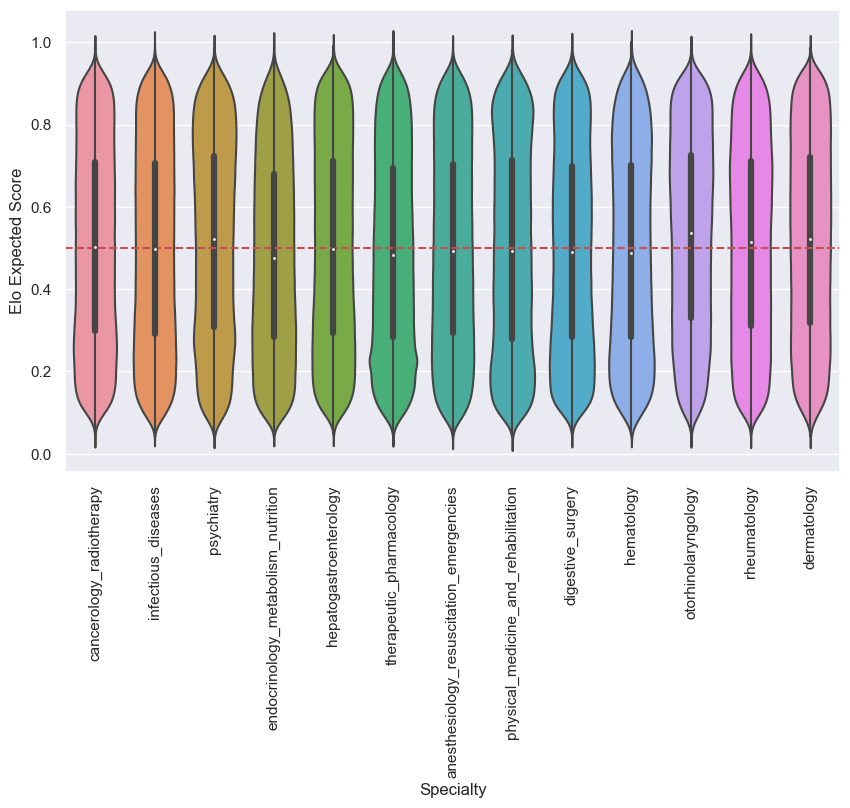

In [13]:
# plot the distribution of the ability_2020_2021 for each specialty with violin plot only for spec_with_enough_questions
plt.figure(figsize=(10, 6))
sns.violinplot(x='specialty', y='ability_2020_2021', data=data_outputs_all[data_outputs_all['specialty'].isin(spec_with_enough_questions)])
plt.xticks(rotation=90)
plt.xlabel('Specialty')
plt.ylabel('Student Ability on Specialty (Specialty Level Ability))')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


# plot the distribution of the student_average_ability for each specialty with violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='specialty', y='student_average_ability',data=data_outputs_all[data_outputs_all['specialty'].isin(spec_with_enough_questions)])
plt.xticks(rotation=90)
plt.xlabel('Specialty')
plt.ylabel('Student Average Ability on Questions (Question Level Ability)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# plot the distribution of the quest_difficulty for each specialty with violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='specialty', y='quest_difficulty',data=data_outputs_all[data_outputs_all['specialty'].isin(spec_with_enough_questions)])
plt.xticks(rotation=90)
plt.xlabel('Specialty')
plt.ylabel('Question Difficulty')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# plot the distribution of the skill_difficulty_difference for each specialty with violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='specialty', y='skill_difficulty_difference', data=data_outputs_all[data_outputs_all['specialty'].isin(spec_with_enough_questions)])
plt.xticks(rotation=90)
plt.xlabel('Specialty')
plt.ylabel('Relative Difficulty (Question Difficulty - Student Average Ability on Question)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# plot the distrinbution of elo_Expected_score for each specialty with violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='specialty', y='elo_ExpectedScore', data=data_outputs_all[data_outputs_all['specialty'].isin(spec_with_enough_questions)])
plt.xticks(rotation=90)
plt.xlabel('Specialty')
plt.ylabel('Elo Expected Score')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.show()



## Averages

In [13]:
# dont include nan values
average_quest_dif = data_outputs_all.groupby(['student', 'specialty']).agg(
    mean_difficulty=('quest_difficulty', 'mean'),
    mean_skill_difficulty_difference=('skill_difficulty_difference', 'mean'),
    mean_skill_difficulty_difference2=('skill_difficulty_difference2', 'mean'),
    mean_actual_score=('actual_score', 'mean'),
    mean_elo_ExpectedScore=('elo_ExpectedScore', 'mean'),
    #mean_difficulty_2019_2020=('difficulty_2019_2020', 'mean'),
    n_question_in_spec_training=('question', 'count'),
    # n_study_days_in_spec_training is the number of unique timestamp_original in the specialty
    n_study_days_in_spec_training= ('timestamp_original', 'nunique'),
    # keep the correcponding group_no for each student
    group_no=('group_no', 'first'),
    # keep ability_2020_2021 for each student
    ability_2020_2021=('ability_2020_2021', 'first'),
    attempt_count_student_2020_2021=('attempt_count_student_2020_2021', 'first'),
    mean_student_average_ability= ('student_average_ability', 'mean')
).reset_index()

In [32]:
# maximum timestamp_original in data_outputs_all
max_timestamp_original = data_outputs_all['timestamp_original'].max()
print('maximum timestamp_original in data_outputs: ', max_timestamp_original)
min_timestamp_original = data_outputs_all['timestamp_original'].min()
print('minimum timestamp_original in data_outputs: ', min_timestamp_original)

maximum timestamp_original in data_outputs:  2021-03-14 23:58:36
minimum timestamp_original in data_outputs:  2020-11-16 00:02:44


In [33]:
# number of unique students in average_quest_dif
unique_students_average_quest_dif = average_quest_dif['student'].unique()
print('number of unique students in average_quest_dif: ', len(unique_students_average_quest_dif))

#number of uniwue students in data_outputs_all
unique_students_data_outputs_all = data_outputs_all['student'].unique()
print('number of unique students in data_outputs_all: ', len(unique_students_data_outputs_all))

# number of unique rows in average_quest_dif
print('number of unique rows in average_quest_dif: ', average_quest_dif.shape[0])

# unique number of student-specialty pairs
print('unique number of student-specialty pairs: ', average_quest_dif[['student', 'specialty']].drop_duplicates().shape[0])

# sparsity of the student-question matrix
# have only student and question columns
student_question = average_quest_dif[['student', 'specialty']]
# Calculate the total number of unique student-question combinations
total_combinations = student_question.drop_duplicates().shape[0]
# Calculate the total number of students
total_students = student_question['student'].nunique()
# Calculate the total number of unique questions
total_spec = student_question['specialty'].nunique()
# Calculate the number of non-null unique student-question combinations
non_null_combinations = student_question.drop_duplicates().shape[0]
# Calculate the sparsity as the ratio of missing values (unique student-question combinations) to total possible values (total_students * total_spec)
sparsity = 1.0 - (non_null_combinations / (total_students * total_spec))
# Convert the sparsity to percentage
sparsity_percentage = sparsity * 100
print('Sparsity (User, Specialty): ', sparsity_percentage, '%')

number of unique students in average_quest_dif:  8633
number of unique students in data_outputs_all:  8633
number of unique rows in average_quest_dif:  253036
unique number of student-specialty pairs:  253036
Sparsity (User, Specialty):  5.450577865131178 %


## Add Proportion Correct & Previous Year Ability and question difficulty to the data

In [14]:
# merge the two data frames by including all the questions
average_quest_dif = pd.merge(average_quest_dif, prop_correct_ecvp, how='inner', on=['student', 'specialty'])
# merge average_quest_dif with st_ability_2019_2020 based on student and specialty only for the shared rows
#average_quest_dif = pd.merge(average_quest_dif, st_ability_2019_2020, how='outer', on=['student', 'specialty'])


# remove rows with nan in any column
#average_quest_dif = average_quest_dif.dropna()


# merge average_quest_dif with slope_df based on student and specialty only for the shared rows
average_quest_dif = pd.merge(average_quest_dif, slope_df, how='inner', on=['student', 'specialty'])


In [10]:
# save the average_quest_dif as csv file to main_path + main_folder
os.chdir(main_path + main_folder)
average_quest_dif.to_csv('average_quest_dif_before filtered.csv', index=False)

In [11]:
average_quest_dif

,student,specialty,mean_difficulty,mean_skill_difficulty_difference,mean_skill_difficulty_difference2,mean_actual_score,mean_elo_ExpectedScore,n_question_in_spec_training,n_study_days_in_spec_training,group_no,ability_2020_2021,attempt_count_student_2020_2021,mean_student_average_ability,prop_correct_ecn,slope
0,18986,anesthesiology_resuscitation_emergencies,-0.537690,0.019962,0.164366,0.333333,0.474800,3,1,1,-0.702056,3.0,-0.557652,0.250000,0.739782
1,18986,cancerology_radiotherapy,0.157587,1.032532,1.348211,0.133333,0.321409,15,1,1,-1.190624,15.0,-0.874945,0.150000,-0.031631
2,18986,cardiovascular,-0.643560,-0.096404,-0.094741,0.583333,0.523496,12,2,1,-0.548819,12.0,-0.547156,0.210526,0.112049
3,18986,dermatology,0.185771,0.991781,0.991781,0.125000,0.323954,8,1,1,-0.806010,8.0,-0.806010,0.250000,0.175961
4,18986,endocrinology_metabolism_nutrition,0.184913,0.385393,0.361712,0.285714,0.394880,7,3,1,-0.176798,7.0,-0.200480,0.250000,-0.153854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231989,287702,pediatrics,-0.405058,-0.910487,-0.867332,0.705882,0.659013,34,12,1,0.462274,34.0,0.505429,0.500000,0.007626
231990,287702,physical_medicine_and_rehabilitation,0.042633,0.061176,0.197150,0.508772,0.482850,57,15,1,-0.154518,57.0,-0.018543,0.529412,0.022018
231991,287702,rheumatology,-0.115799,-0.270801,-0.274090,0.510638,0.528323,47,7,1,0.158290,47.0,0.155002,0.500000,-0.016250
231992,287702,therapeutic_pharmacology,0.912672,1.186355,1.186355,0.000000,0.227544,1,1,1,-0.273683,1.0,-0.273683,0.423077,0.593178


### get statistics on the averaged data but before filtering 

In [12]:
import pandas as pd
import scipy.stats

# Assuming 'average_quest_dif' is your DataFrame and has been defined earlier in your environment.
# Selecting the columns you need
for_table = average_quest_dif

# rename for_table mean_skill_difficulty_difference as Relative Difficulty
for_table = for_table.rename(columns={'mean_skill_difficulty_difference': 'mean_relative_difficulty'})
# rename for_table ability_2020_2021 as Student Ability
for_table = for_table.rename(columns={'ability_2020_2021': 'student_ability'})
#rename slope as raltive_difficulty_slope
for_table = for_table.rename(columns={'slope': 'relative_difficulty_slope'})

# Calculating the means and standard deviations for your variables
means = for_table.mean()
sds = for_table.std()

# Preparing the data for the correlation matrix
correlations = for_table.corr()

# Create a new DataFrame to hold the formatted table with means, SDs, and correlations
formatted_table = pd.DataFrame(index=correlations.index, columns=['M', 'SD'] + correlations.columns.tolist())

# Populate the means and standard deviations
formatted_table['M'] = means
formatted_table['SD'] = sds

# Function to determine significance asterisks
def significance_asterisks(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return ''

# Populate the correlations with significance testing
for col in correlations.columns:
    for row in correlations.index:
        if col == row:
            # Diagonals are not displayed in the table
            formatted_table.at[row, col] = '—'
        else:
            # Calculate the p-value
            corr, p_value = scipy.stats.pearsonr(for_table[row], for_table[col])
            # Format with two decimal places and add significance asterisks
            formatted_table.at[row, col] = f'{corr:.2f}{significance_asterisks(p_value)}'

# You can save this table to a CSV or Excel file, or print it out
formatted_table.to_csv('formatted_correlation_table_with_significance.csv')
formatted_table

C:\Users\Ghislaine\AppData\Local\Temp\ipykernel_13172\2201014740.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = for_table.mean()
C:\Users\Ghislaine\AppData\Local\Temp\ipykernel_13172\2201014740.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sds = for_table.std()


,M,SD,student,mean_difficulty,mean_relative_difficulty,mean_skill_difficulty_difference2,mean_actual_score,mean_elo_ExpectedScore,n_question_in_spec_training,n_study_days_in_spec_training,student_ability,attempt_count_student_2020_2021,mean_student_average_ability,prop_correct_ecn,relative_difficulty_slope
student,120166.794042,45086.676809,—,0.02***,0.02***,0.01***,-0.02***,-0.02***,0.02***,0.02***,-0.00,0.02***,-0.00,-0.01***,0.00
mean_difficulty,0.047325,0.325362,0.02***,—,0.70***,0.66***,-0.54***,-0.70***,-0.19***,-0.15***,-0.15***,-0.19***,-0.15***,-0.08***,0.10***
mean_relative_difficulty,0.095948,0.548511,0.02***,0.70***,—,0.97***,-0.87***,-0.98***,-0.28***,-0.20***,-0.77***,-0.28***,-0.81***,-0.28***,0.06***
mean_skill_difficulty_difference2,0.104771,0.587719,0.01***,0.66***,0.97***,—,-0.87***,-0.95***,-0.27***,-0.19***,-0.84***,-0.27***,-0.81***,-0.25***,0.05***
mean_actual_score,0.457681,0.149046,-0.02***,-0.54***,-0.87***,-0.87***,—,0.88***,0.20***,0.15***,0.76***,0.20***,0.77***,0.27***,-0.05***
mean_elo_ExpectedScore,0.467676,0.100170,-0.02***,-0.70***,-0.98***,-0.95***,0.88***,—,0.25***,0.20***,0.74***,0.25***,0.78***,0.28***,-0.06***
n_question_in_spec_training,124.756179,178.722747,0.02***,-0.19***,-0.28***,-0.27***,0.20***,0.25***,—,0.63***,0.22***,1.00***,0.23***,0.07***,0.01**
n_study_days_in_spec_training,18.542928,51.719636,0.02***,-0.15***,-0.20***,-0.19***,0.15***,0.20***,0.63***,—,0.15***,0.63***,0.15***,0.04***,0.00
student_ability,-0.057446,0.444116,-0.00,-0.15***,-0.77***,-0.84***,0.76***,0.74***,0.22***,0.15***,—,0.22***,0.95***,0.28***,0.00
attempt_count_student_2020_2021,124.756179,178.722747,0.02***,-0.19***,-0.28***,-0.27***,0.20***,0.25***,1.00***,0.63***,0.22***,—,0.23***,0.07***,0.01**


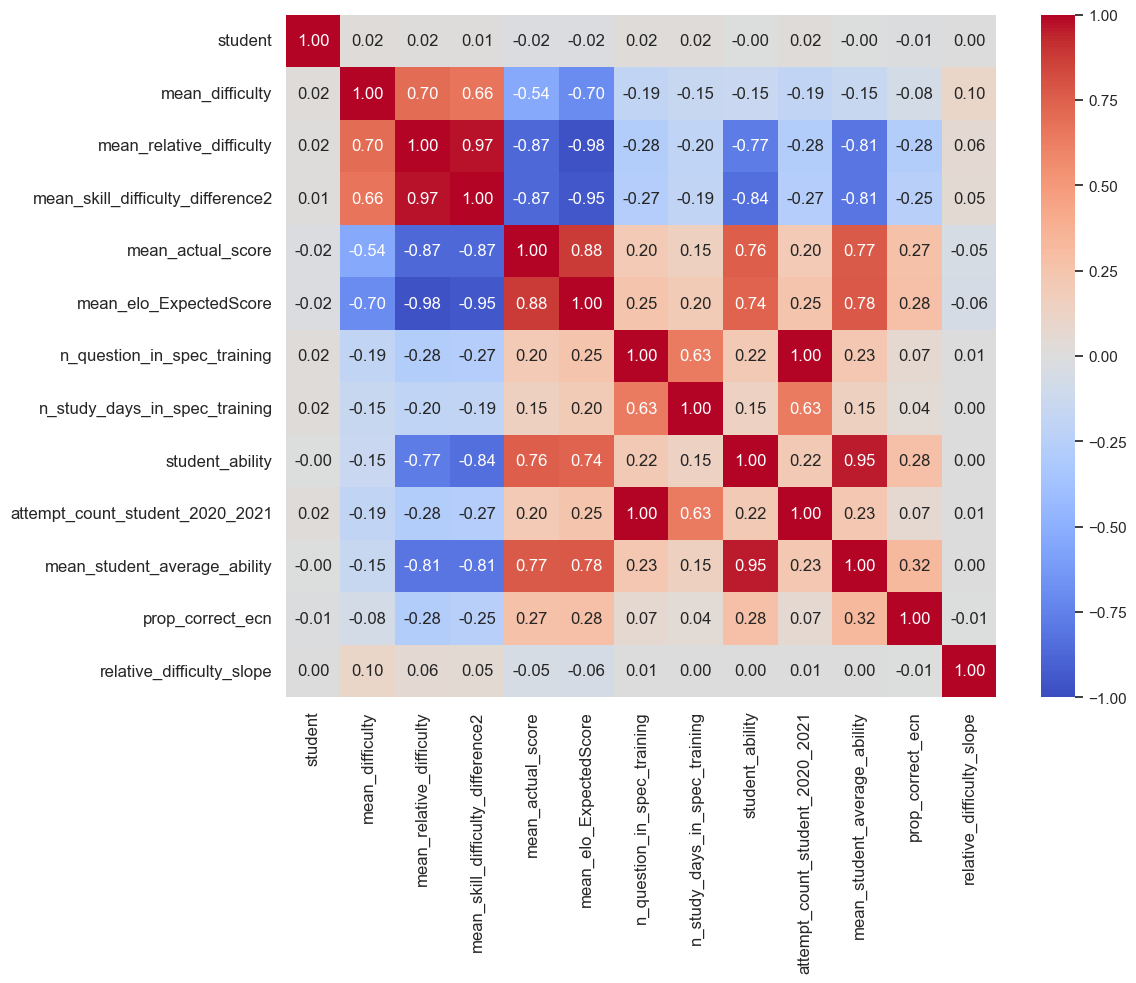

In [13]:
# correlation matrix for_table 
correlation_matrix = for_table.corr()
correlation_matrix

# correlatation matrix with colors and values
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Filter the data and summarize the filteres data

In [19]:
average_quest_dif_copy = average_quest_dif.copy()

In [52]:
average_quest_dif=average_quest_dif_copy
# save average_quest_dif as average_quest_dif_without_filter.csv
os.chdir(main_path + main_folder)
average_quest_dif.to_csv('average_quest_dif_without_filter.csv', index=False)

In [ ]:
# read average_quest_dif_without_filter.csv
os.chdir(main_path + main_folder)
average_quest_dif = pd.read_csv('average_quest_dif_without_filter.csv')


# filter 100

In [30]:
average_quest_dif=average_quest_dif_copy
average_quest_dif_copy = average_quest_dif.copy()


In [15]:
limit_n_question_in_spec_training= 100

In [16]:
# unique students in average_quest_dif
unique_students = average_quest_dif['student'].unique()

# remove the rows with NAN quest_difficulty (student in exam but not in training)
average_quest_dif = average_quest_dif[~average_quest_dif['mean_difficulty'].isnull()]
# nb of removed unique students
unique_students_after_filter_1= average_quest_dif['student'].unique()
print('nb of removed students with nan quest_difficulty (): ', len(set(unique_students)-set(unique_students_after_filter_1)))

# keep only the rows with specialty in spec_with_enough_questions
average_quest_dif = average_quest_dif[average_quest_dif['specialty'].isin(spec_with_enough_questions)]


# keep only rows with n_question_in_spec_training>=limit_n_question_in_spec_training
average_quest_dif = average_quest_dif[average_quest_dif['n_question_in_spec_training']>=limit_n_question_in_spec_training]
#nb of removed unique students
unique_students_after_filter_2= average_quest_dif['student'].unique()
print('nb of removed students with n_question_in_spec_training<limit_n_question_in_spec_training: ', len(set(unique_students_after_filter_1)-set(unique_students_after_filter_2)))


# keep only students with at least limit_st_with_n_spec_in_ECNP rows
average_quest_dif = average_quest_dif.groupby('student').filter(lambda x: len(x) >= limit_st_with_n_spec_in_ECNP)
# nb of removed unique students
unique_students_after_filter_3= average_quest_dif['student'].unique()
print('nb of removed students with less than limit_st_with_n_spec_in_ECNP rows: ', len(set(unique_students_after_filter_2)-set(unique_students_after_filter_3)))

# turn students column into categorical
average_quest_dif['student'] = average_quest_dif['student'].astype('category')


# Tprint nb unique students
print('number of unique students in the end: ', len(average_quest_dif['student'].unique()))
print('number of unique specialties in the end: ', len(average_quest_dif['specialty'].unique()))


# number of rows in average_quest_dif
print('number of rows in average_quest_dif: ', average_quest_dif.shape[0])

# number of unique student-specialty pairs
print('number of unique student-specialty pairs: ', average_quest_dif[['student', 'specialty']].drop_duplicates().shape[0])

nb_removed1=len(set(unique_students)-set(unique_students_after_filter_1))
nb_removed2=len(set(unique_students_after_filter_1)-set(unique_students_after_filter_2))
total_removed=nb_removed1+nb_removed2
# percentage of total students removed
print('percentage of total students removed in filtering: ', (total_removed/len(unique_students))*100, '%')

# sparsity of the student-question matrix
# have only student and question columns
student_question = average_quest_dif[['student', 'specialty']]
# Calculate the total number of unique student-question combinations
total_combinations = student_question.drop_duplicates().shape[0]
# Calculate the total number of students
total_students = student_question['student'].nunique()
# Calculate the total number of unique questions
total_spec = student_question['specialty'].nunique()
# Calculate the number of non-null unique student-question combinations
non_null_combinations = student_question.drop_duplicates().shape[0]
# Calculate the sparsity as the ratio of missing values (unique student-question combinations) to total possible values (total_students * total_spec)
sparsity = 1.0 - (non_null_combinations / (total_students * total_spec))
# Convert the sparsity to percentage
sparsity_percentage = sparsity * 100
print('Sparsity (User, Specialty): ', sparsity_percentage, '%')

nb of removed students with nan quest_difficulty ():  0
nb of removed students with n_question_in_spec_training<limit_n_question_in_spec_training:  1286
nb of removed students with less than limit_st_with_n_spec_in_ECNP rows:  2905
number of unique students in the end:  4416
number of unique specialties in the end:  13
number of rows in average_quest_dif:  39367
number of unique student-specialty pairs:  39367
percentage of total students removed in filtering:  14.941326827001278 %
Sparsity (User, Specialty):  31.425933667781493 %


In [19]:
# save the average_quest_dif as csv file to main_path + main_folder
os.chdir(main_path + main_folder)
average_quest_dif.to_csv('average_quest_dif_100_5spec.csv', index=False)

## Turn relative difficulty to logistic regression results

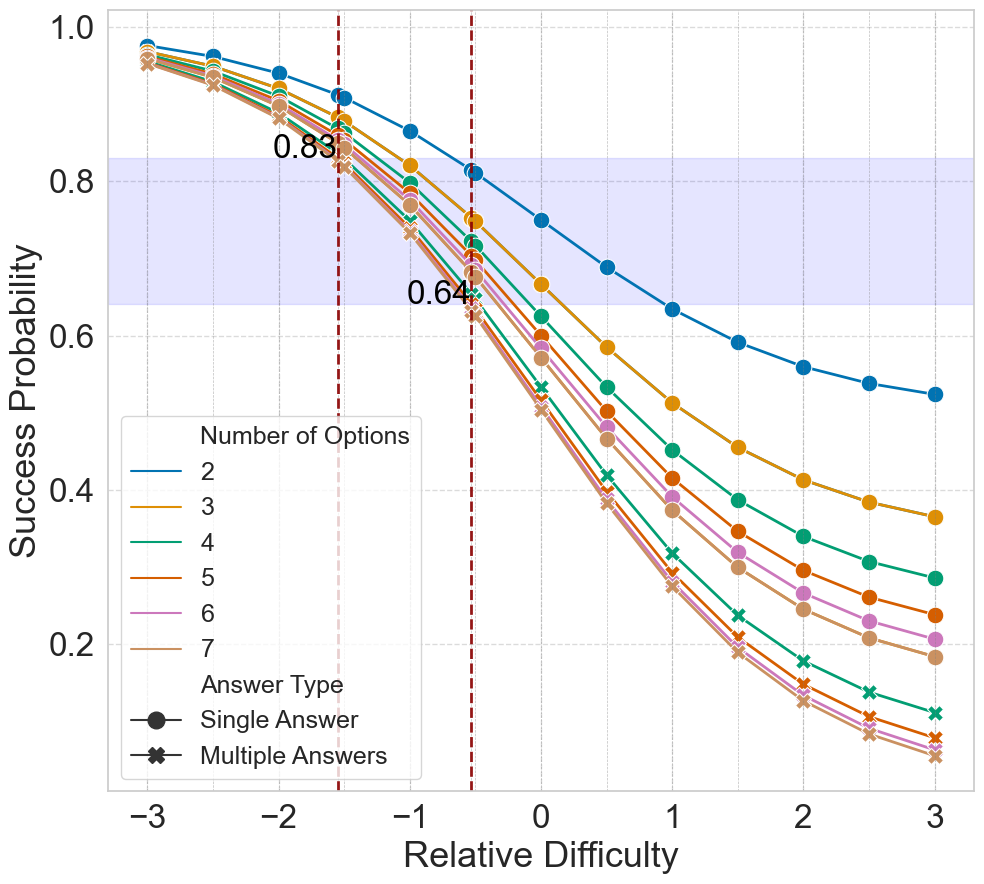

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import itertools
import math



def probability_guessing(n_opt, answer_type):
    n_combinations = sum([math.comb(n_opt, k) for k in range(1, n_opt + 1)])
    p = 1 / (n_opt if answer_type == 'Single Answer' else n_combinations)
    return p

def expect_score(relative_difficulty, n_options, answer_type):
    guess_prob = probability_guessing(n_options, answer_type)
    knowledge_prob = 1 - guess_prob
    logistic_input = 1 + np.exp(-(-relative_difficulty))
    return guess_prob + (knowledge_prob / logistic_input)

possible_relative_difficulty = [-3, -2, -2.5, -1.55, -1.5, -1, -0.53, -0.5, 0, 1, 0.5, 1.5, 2, 2.5, 3]
possible_n_options = [2, 3, 4, 5, 6, 7]
possible_answer_type = ['Single Answer', 'Multiple Answers']

# Create a dataframe with all the possible combinations of relative_difficulty, n_options, and answer_type
df_possible_combinations = pd.DataFrame(list(itertools.product(possible_relative_difficulty, possible_n_options, possible_answer_type)), columns=['Relative Difficulty', 'Number of Options', 'Answer Type'])

# Add the expected_score column
df_possible_combinations['Expected Score'] = df_possible_combinations.apply(lambda x: expect_score(x['Relative Difficulty'], x['Number of Options'], x['Answer Type']), axis=1)

# Create the plot
plt.figure(figsize=(10, 9))
sns.set(style="whitegrid")
sns.lineplot(x='Relative Difficulty', y='Expected Score', hue='Number of Options', style='Answer Type', data=df_possible_combinations, palette='colorblind', markers=True, dashes=False, linewidth=2, markersize=12)
plt.xlabel('Relative Difficulty', fontsize=26)
plt.ylabel('Success Probability', fontsize=26)
#plt.title('Expected Score vs. Relative Difficulty for Multiple-Choice Questions', fontsize=18)
#plt.legend(title='', loc='best', fontsize=18)
# add the -1.55 and -0.53 into the xticks
# increase the font of x tics
plt.xticks(fontsize=24)
# increase the font of y tics
plt.yticks(fontsize=24)

# Adjusting legend properties
leg = plt.legend(title='', loc='best', fontsize=18)
for line in leg.get_lines():  # Access each line in the legend
    line.set_markersize(12)    # Adjust the marker size


# Customization for a cleaner, professional look
plt.grid(True, linestyle='--', alpha=0.7)
for i in possible_relative_difficulty:
    plt.axvline(x=i, color='gray', linestyle='--', ymax=2, alpha=0.5, linewidth=0.5)

# Highlighting specific areas and annotating
expected_score_min = expect_score(-1.55, 5, 'Multiple Answers')
expected_score_max = expect_score(-0.53, 5, 'Multiple Answers')
plt.axhspan(expected_score_min, expected_score_max, color='blue', alpha=0.1)
plt.text(-1.55, expected_score_min, f'{round(expected_score_min, 2)}', fontsize=24, color='black', ha='right')
plt.text(-0.53, expected_score_max, f'{round(expected_score_max, 2)}', fontsize=24, color='black', ha='right')

# make the vertical line at x=-1.55 and x=-0.53 thicker and dark red and dashed
plt.axvline(x=-1.55, color='darkred', linestyle='--', ymax=2, alpha=0.9, linewidth=2)
plt.axvline(x=-0.53, color='darkred', linestyle='--', ymax=2, alpha=0.9, linewidth=2)


plt.tight_layout()
plt.savefig('successprobability_vs_relative_difficulty.png')
plt.show()



### Save data for the linear mixed model

In [41]:
# save the average_quest_dif as csv file to main_path + main_folder
os.chdir(main_path + main_folder)
average_quest_dif.to_csv('average_quest_dif_100.csv', index=False)

In [4]:
average_quest_dif

,student,specialty,mean_difficulty,mean_skill_difficulty_difference,mean_skill_difficulty_difference2,mean_actual_score,mean_elo_ExpectedScore,n_question_in_spec_training,n_study_days_in_spec_training,group_no,ability_2020_2021,attempt_count_student_2020_2021,mean_student_average_ability,prop_correct_ecn,slope
0,24635,cancerology_radiotherapy,0.010821,0.326942,0.436403,0.427632,0.426793,152,24,1,-0.425582,152.0,-0.316121,0.220000,0.001821
1,24635,endocrinology_metabolism_nutrition,0.000678,0.272750,0.317280,0.387097,0.425952,155,10,1,-0.316602,155.0,-0.272072,0.416667,-0.002256
2,24635,hematology,-0.236269,0.073987,0.133513,0.467890,0.473224,109,15,1,-0.369781,109.0,-0.310255,0.272727,0.000283
3,24635,hepatogastroenterology,-0.074080,0.102102,-0.004289,0.449541,0.443039,109,10,1,-0.069791,109.0,-0.176182,0.423077,-0.000947
4,24635,infectious_diseases,-0.098140,-0.002910,-0.091698,0.489247,0.474487,186,25,1,-0.006442,186.0,-0.095229,0.333333,0.000079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45431,277282,rheumatology,-0.130863,0.375575,0.273660,0.391304,0.413909,276,32,1,-0.404523,276.0,-0.506439,0.366667,-0.003833
45432,277282,therapeutic_pharmacology,-0.014322,0.469295,0.504450,0.376771,0.396668,353,37,1,-0.518772,353.0,-0.483617,0.301887,-0.001431
45433,287538,cancerology_radiotherapy,-0.303083,0.343297,0.396265,0.372549,0.443742,102,10,1,-0.699348,102.0,-0.646380,0.340000,-0.003996
45434,287538,endocrinology_metabolism_nutrition,-0.245391,0.053022,-0.001769,0.438596,0.459760,114,8,1,-0.243623,114.0,-0.298413,0.555556,-0.002984


### #### FOR PAPER STAT INFO ####

#### Training Data

In [ ]:
# read train_data_original.csv
os.chdir('C:\\Users\\Ghislaine\\Desktop\\optimal_difficulty_1\\code\\data\\sides\\elo_bins')
train_data_original = pd.read_csv('train_data_original.csv')





In [ ]:
# Total Nb Attempts(n rows)
total_nb_attempts = len(train_data_original)
print('Total Nb Attempts(n rows): ', total_nb_attempts)

# Nb Students 
nb_students = len(train_data_original['student'].unique())
print('Nb Students: ', nb_students)

# Nb Questions
nb_questions = len(train_data_original['question'].unique())
print('Nb Questions: ', nb_questions)

# Nb Specialties
nb_specialties = len(train_data_original['specialty'].unique())
print('Nb Specialties: ', nb_specialties)

# sparsity of the student-question matrix
# have only student and question columns
student_question = train_data_original[['student', 'question']]
# Calculate the total number of unique student-question combinations
total_combinations = student_question.drop_duplicates().shape[0]
# Calculate the total number of students
total_students = student_question['student'].nunique()
# Calculate the total number of unique questions
total_questions = student_question['question'].nunique()
# Calculate the number of non-null unique student-question combinations
non_null_combinations = student_question.drop_duplicates().shape[0]
# Calculate the sparsity as the ratio of missing values (unique student-question combinations) to total possible values (total_students * total_questions)
sparsity = 1.0 - (non_null_combinations / (total_students * total_questions))
# Convert the sparsity to percentage
sparsity_percentage = sparsity * 100
print('Sparsity (User, Question): ', sparsity_percentage, '%')

#### Test Data

In [ ]:
# # read test_data_original.csv
os.chdir('C:\\Users\\Ghislaine\\Desktop\\optimal_difficulty_1\\code\\data\\sides\\elo_bins')
test_data_original = pd.read_csv('test_data_original_real.csv')

In [ ]:
# Total Nb Attempts(n rows)
total_nb_attempts = len(test_data_original)
print('Total Nb Attempts(n rows): ', total_nb_attempts)

# Nb Students
nb_students = len(test_data_original['student'].unique())
print('Nb Students: ', nb_students)

# Nb Questions
nb_questions = len(test_data_original['question'].unique())
print('Nb Questions: ', nb_questions)

# Nb Specialties
nb_specialties = len(test_data_original['specialty'].unique())
print('Nb Specialties: ', nb_specialties)

# sparsity of the student-question matrix
# have only student and question columns
student_question = test_data_original[['student', 'question']]
# Calculate the total number of unique student-question combinations
total_combinations = student_question.drop_duplicates().shape[0]
# Calculate the total number of students
total_students = student_question['student'].nunique()
# Calculate the total number of unique questions
total_questions = student_question['question'].nunique()
# Calculate the number of non-null unique student-question combinations
non_null_combinations = student_question.drop_duplicates().shape[0]
# Calculate the sparsity as the ratio of missing values (unique student-question combinations) to total possible values (total_students * total_questions)
sparsity = 1.0 - (non_null_combinations / (total_students * total_questions))
# Convert the sparsity to percentage
sparsity_percentage = sparsity * 100
print('Sparsity (User, Question): ', sparsity_percentage, '%')

